In [240]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.model_selection import train_test_split

In [241]:
data = pd.read_csv("/home/priyansh/ML PROJECTS/Liver Disease/Liver_disease_data.csv")

In [242]:
train,test = train_test_split(data,test_size=0.2,random_state=100)

In [243]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

In [244]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [245]:
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)

In [246]:
# CREATING MODEL:



class Model(nn.Module):
    
    
    def __init__(self, in_features=10, h1 = 10 , h2 = 10 , out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
        
        
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x
    
    

In [247]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=10, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)>

In [248]:
torch.manual_seed(100)


model = Model()

In [249]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [250]:
def prediction(y_pred):
    y_pred = y_pred.detach().numpy().reshape(-1,2)
    return np.argmax(y_pred,axis=1)


def cal_accuracy(y_pred,y_train):
    y_train = y_train.detach().numpy()
    return np.sum(y_train == y_pred)/y_pred.shape[0]

In [251]:
# TRAIn model:



epochs = 10000

losses = []
Accuracy=[]

for i in range(epochs):
    y_pred = model.forward(X_train)
    
    diog = prediction(y_pred)
    
    accuracy = cal_accuracy(diog,y_train)
    Accuracy.append(accuracy)
    
    loss = criterion(y_pred,y_train)
    
    losses.append(loss.detach().numpy())
    
    if i%100 ==0:
        print(f"Epoch: {i} , Loss: {loss} , Accuracy: {accuracy*100}% ")   # 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    

Epoch: 0 , Loss: 1.8367668390274048 , Accuracy: 40.14705882352941% 
Epoch: 100 , Loss: 0.684309720993042 , Accuracy: 58.602941176470594% 
Epoch: 200 , Loss: 0.6288884878158569 , Accuracy: 62.86764705882353% 
Epoch: 300 , Loss: 0.5852807760238647 , Accuracy: 67.3529411764706% 
Epoch: 400 , Loss: 0.5514234900474548 , Accuracy: 71.17647058823529% 
Epoch: 500 , Loss: 0.5243388414382935 , Accuracy: 74.19117647058823% 
Epoch: 600 , Loss: 0.49883148074150085 , Accuracy: 76.17647058823529% 
Epoch: 700 , Loss: 0.47470271587371826 , Accuracy: 77.79411764705883% 
Epoch: 800 , Loss: 0.453086793422699 , Accuracy: 78.67647058823529% 
Epoch: 900 , Loss: 0.4332897961139679 , Accuracy: 79.8529411764706% 
Epoch: 1000 , Loss: 0.4172372817993164 , Accuracy: 80.95588235294117% 
Epoch: 1100 , Loss: 0.4054158926010132 , Accuracy: 81.91176470588235% 
Epoch: 1200 , Loss: 0.39662039279937744 , Accuracy: 82.6470588235294% 
Epoch: 1300 , Loss: 0.390173077583313 , Accuracy: 82.94117647058825% 
Epoch: 1400 , Loss: 

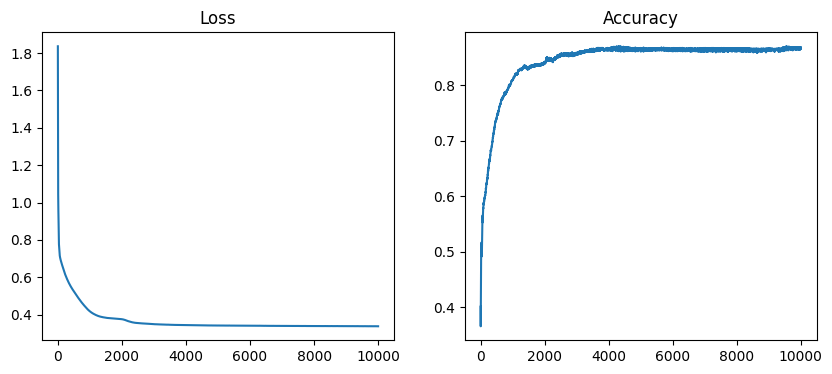

In [252]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot data on each subplot
axs[0].plot(range(epochs),losses)
axs[0].set_title('Loss')

axs[1].plot(range(epochs),Accuracy)
axs[1].set_title('Accuracy')

# Display the figure
plt.show()

In [255]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]


X_test = torch.FloatTensor(np.array(X_test))
y_test = torch.LongTensor(np.array(y_test))

In [263]:
# Test on test_data:
with torch.no_grad():
    y_pred = model.forward(X_test)
    y_pred = prediction(y_pred)
    acc= cal_accuracy(y_pred,y_test)
    print(f"Train Accuracy: {Accuracy[-1]*100:.2f}% ")
    print(f"Test Accurcay: {acc*100 :.2f}%")
   





Train Accuracy: 86.76% 
Test Accurcay: 83.24%
